# PyTesseract in Depth

## Functions

get_tesseract_version<br><br>
Returns the Tesseract version installed in the system.

In [2]:

import pytesseract

print(pytesseract.get_tesseract_version())


4.1.1


image_to_string<br><br>
Returns the result of a Tesseract OCR run on the image to string

This iS @ sample piece of text used for Fy Tesseract testing purposes.


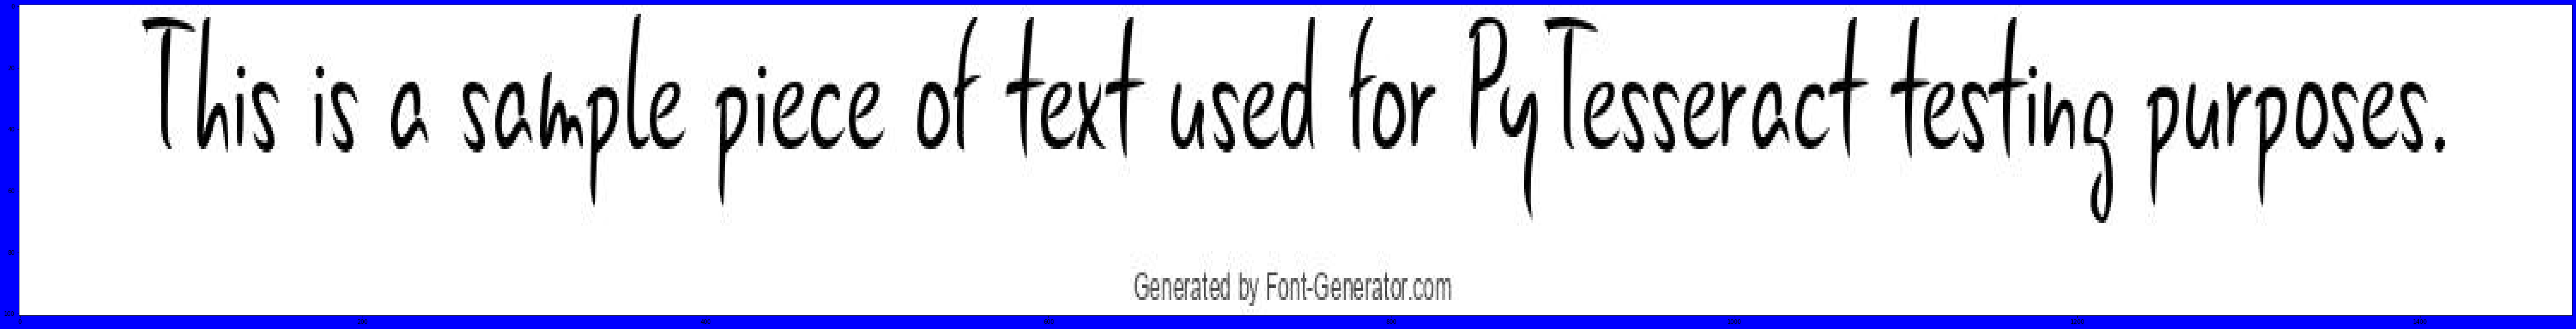

In [3]:

import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline


path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)

plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')
result_string = pytesseract.image_to_string(image=img)
print(result_string)


image_to_boxes<br><br>
Returns result containing recognized characters and their box boundaries

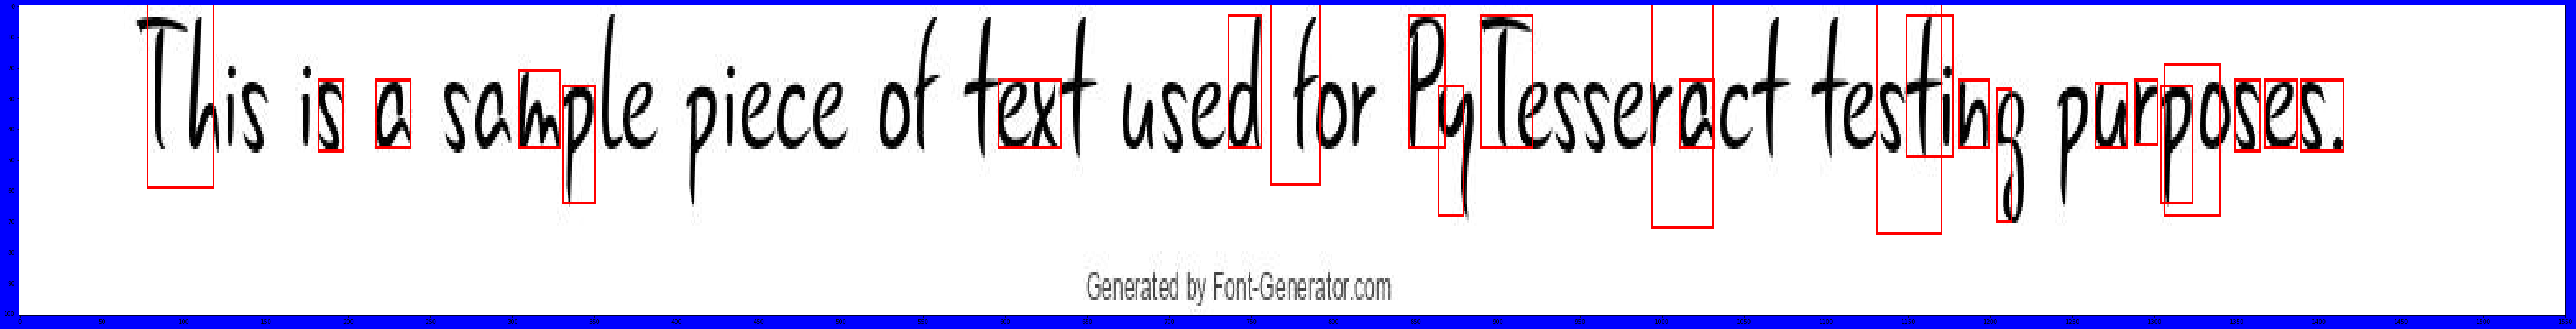

In [4]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
result_box = pytesseract.image_to_boxes(image=img)

# bounding rectangle dictionary of coordinates
rect_dict = dict((line[0], [int(c) for c in line.split()[1:5]]) for line in result_box.split(sep='\n'))

# DEBUGGING PURPOSES ONLY
if not __debug__:
    print(type(result_box))
    print(result_box)

# drawing bounding rectangles
im = Image.open(fp=path, mode='r')
draw = ImageDraw.Draw(im=im)
for rect in rect_dict.values():
    """Draw a bounding rectangle for each letter"""
    draw.rectangle(xy=[(rect[0], 100-rect[1]), (rect[2], 100-rect[3])], fill=None, outline='red')
im_bound = np.asarray(a=im)

# plotting
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=im_bound, aspect='auto', origin='upper', cmap='gray')
plt.xticks(np.arange(0, 1600, 50))
plt.yticks(np.arange(0, 110, 10))
if not __debug__:
    print(im_bound)


image_to_data<br><br>
Returns result containing box boundaries, confidences, and other information.<br>
Requires Tesseract 3.05+. For more information, please check the Tesseract TSV documentation

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
dict_values([[1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0, 72, 72, 72, 72, 173, 217, 259, 406, 524, 557, 672, 762, 846, 890, 1075, 1241], [0, 0, 0, 0, 0, 20, 25, 0, 16, 4, 0, 4, 0, 4, 0, 0, 20], [1489, 1343, 1343, 1343, 76, 24, 21, 123, 98, 37, 99, 84, 60, 33, 188, 138, 174], [101, 75, 75, 75, 60, 28, 22, 69, 53, 43, 59, 44, 59, 65, 73, 75, 49], ['-1', '-1', '-1', '-1', 96, 88, 31, 86, 95, 96, 96, 96, 96, 77, 9, 90, 94], ['', '', '', '', 'This', 'iS', '@', 'sample', 'piece', 'of', 'text', 'used', 'for', 'Fy', 'Tesseract', 'testing', 'purposes.']])


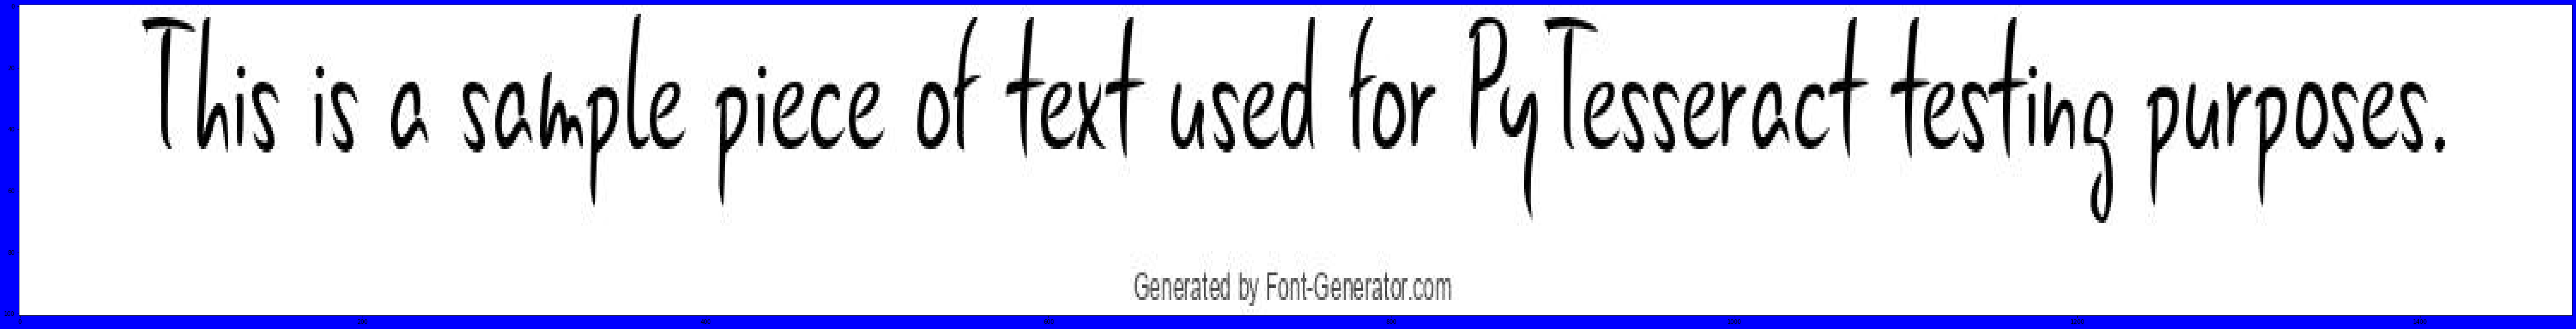

In [5]:


import cv2
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_data = pytesseract.image_to_data(image=img, output_type=Output.DICT)
if __debug__:
    print(img_data.keys())
    print(img_data.values())
    
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')


image_to_osd<br><br>
Returns result containing information about orientation and script detection.

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 3.15
Script: Cyrillic
Script confidence: 6.67


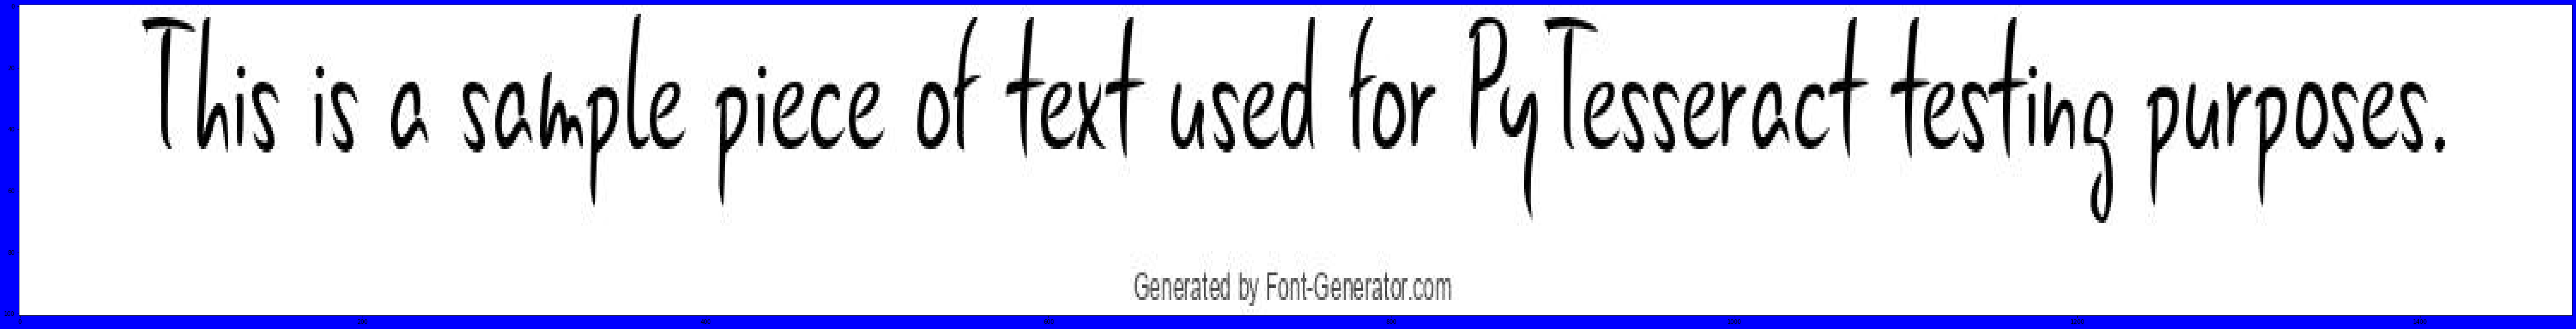

In [6]:


import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_osd = pytesseract.image_to_osd(image=img)
if __debug__:
    print(img_osd)
    
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')


run_and_get_output<br><br>
Returns the raw output from Tesseract OCR. Gives a bit more control over the parameters that are sent to tesseract.

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/jb9c2bnn2c51hptzd6s6y_6m0000gn/T/tess_9m0czw4d.'

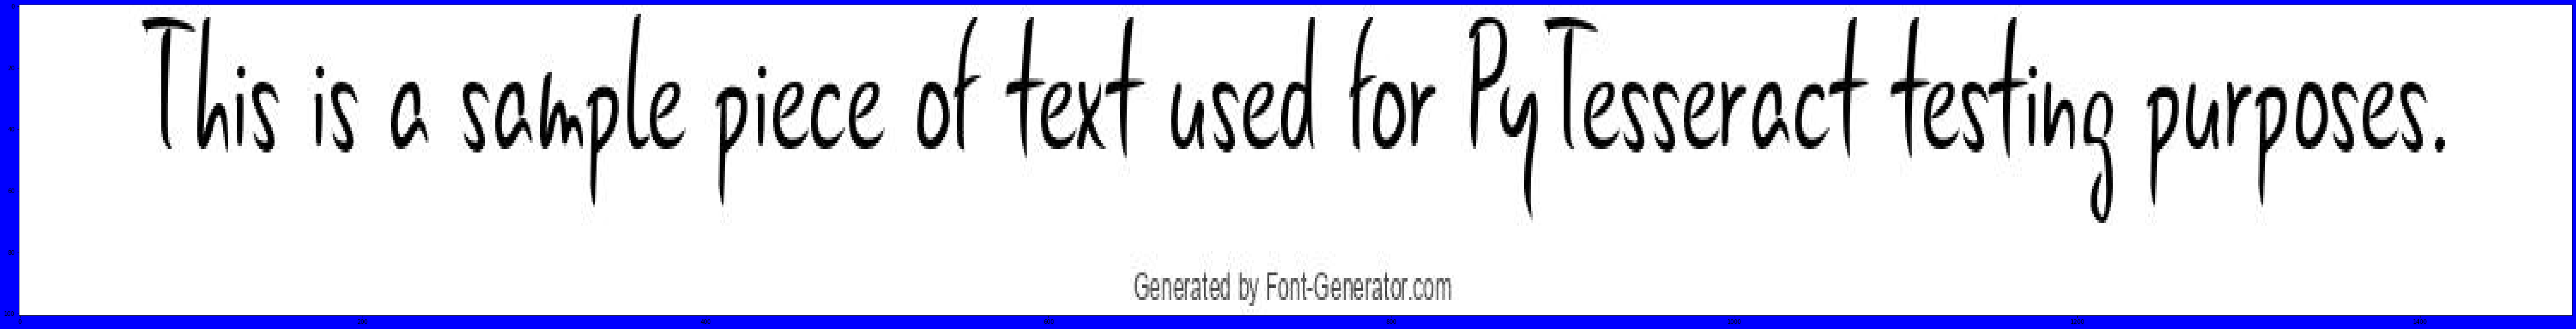

In [7]:



import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')

img_run = pytesseract.run_and_get_output(image=img)
if __debug__:
    print(img_run)



## Parameters for Functions

image Object or String - PIL Image/NumPy array or file path of the image to be processed by Tesseract. If you pass object instead of file path, pytesseract will implicitly convert the image to RGB mode.<br><br>
lang String - Tesseract language code string. Defaults to eng if not specified! Example for multiple languages: lang='eng+fra'<br><br>
config String - Any additional custom configuration flags that are not available via the pytesseract function. For example: config='--psm 6'<br><br>
nice Integer - modifies the processor priority for the Tesseract run. Not supported on Windows. Nice adjusts the niceness of unix-like processes.<br><br>
output_type Class attribute - specifies the type of the output, defaults to string. For the full list of all supported types, please check the definition of pytesseract.Output class.<br><br>
timeout Integer or Float - duration in seconds for the OCR processing, after which, pytesseract will terminate and raise RuntimeError.<br><br>
pandas_config Dict - only for the Output.DATAFRAME type. Dictionary with custom arguments for pandas.read_csv. Allows you to customize the output of image_to_data.

## CV2 Pipeline for Image Processing

In [11]:

import copy
from collections import OrderedDict
import numpy as np
import typing
from typing import Callable
%matplotlib inline

class CV2Pipeline:
    pass

class CV2Pipeline:
    """Pipeline for processing images"""
    def __init__(self):
        """Initializes empty pipeline"""
        self.pipeline = OrderedDict([])

    @property
    def pipeline(self) -> list:
        """Getter for pipeline"""
        return self.__pipeline
    
    @pipeline.setter
    def pipeline(self, new_pipeline: CV2Pipeline) -> None:
        """Setter for pipeline"""
        self.__pipeline = copy.deepcopy(x=new_pipeline)
    
    def size(self) -> int:
        """Number of steps in pipeline"""
        return len(self.pipeline)
    
    def empty(self) -> bool:
        """Check if any steps exist in pipeline"""
        return self.size() > 0
    
    def clear(self) -> None:
        """Erase all steps from pipeline"""
        self.pipeline = OrderedDict([])
        
    def copy_steps(self, other_pipeline: CV2Pipeline, start:int=0, end:int=None) -> None:
        """
        Copies whole or part of steps from another pipeline
        
        Parameters
        other_pipeline - another CV2Pipeline object to copy from
        start - index of first step to be copied from other_pipeline
        end - index of immediate step after last step to be copied from other_pipeline
        """
        # Error checking
        try:
            if other_pipeline.empty():
                raise AttributeError('other_pipeline cannot be empty')
            if end > other_pipeline.size() or end == None:
                raise RuntimeError('end must be integer no greater than size of other_pipeline')
        except AttributeError or RuntimeErrorn as error:
            print(str(error))
            return
            
        self.pipeline = OrderedDict(list(other_pipeline.pipeline.items())[start:end])
        
    def add_step(self, name: str, new_step: Callable, img_param_name: str, other_params: dict, capture_index: int=None) -> None:
        """
        Append new function to end of pipeline
        
        Parameters
        name - annotated name of step
        new_step - function to be added
        img_param_name - parameter name designated for image
        other_params - dictionary of other required parameters and their values besides image
        capture_index - if function returns multiple values, specify index of return tuple
        """
        # Error checking
#         try:
#             if typing.get_type_hints(obj=new_step)['return'] != np.array:
#                 raise TypeError('return type must be numpy array')
#         except TypeError as error:
#             print(str(error))
#             return
        
        step_tuple = (new_step, img_param_name, other_params) if capture_index == None \
        else (new_step, img_param_name, other_params, capture_index)
        self.pipeline.update({name: step_tuple})
        
    def run(self, img: np.array, until: int=None) -> np.array:
        """Run an original image through pipeline"""
        try:
            if until != None and (until < 0 or until > self.size()):
                raise IndexError('until must specify step index within pipeline')
        except IndexError as error:
            print(str(error))
            return
        
        # Running pipeline
        start = 0
        end = until if until != None else self.size()
        img_current = img
        for step in list(self.pipeline.values())[start:end]:
            """Run each function sequentially in pipeline"""
            func = step[0]
            img_param_name = step[1]
            other_params = step[2]
            capture_index = step[3] if len(step) == 4 else None
            args = {img_param_name: img_current, **other_params}
            img_current = func(**args)[capture_index] if capture_index != None else func(**args)

        return img_current


## CV2 Pipeline Example

['', '', '', '', '  ', '', ' ', '', '', '', 'aa', 'ANE', 'RITE', '', '', 'But', 'if', 'you', 'judge', 'a', 'fish', 'by', 'its', 'ability', '', 'OAT', 'eR', 'em', 'MLLER', 'LBS', '', '', 'Nee', 'Ca', 'Teme', 'ST', '', '', '', '-', 'Albert', 'Einstein', '', '', '', 'Goalcast']


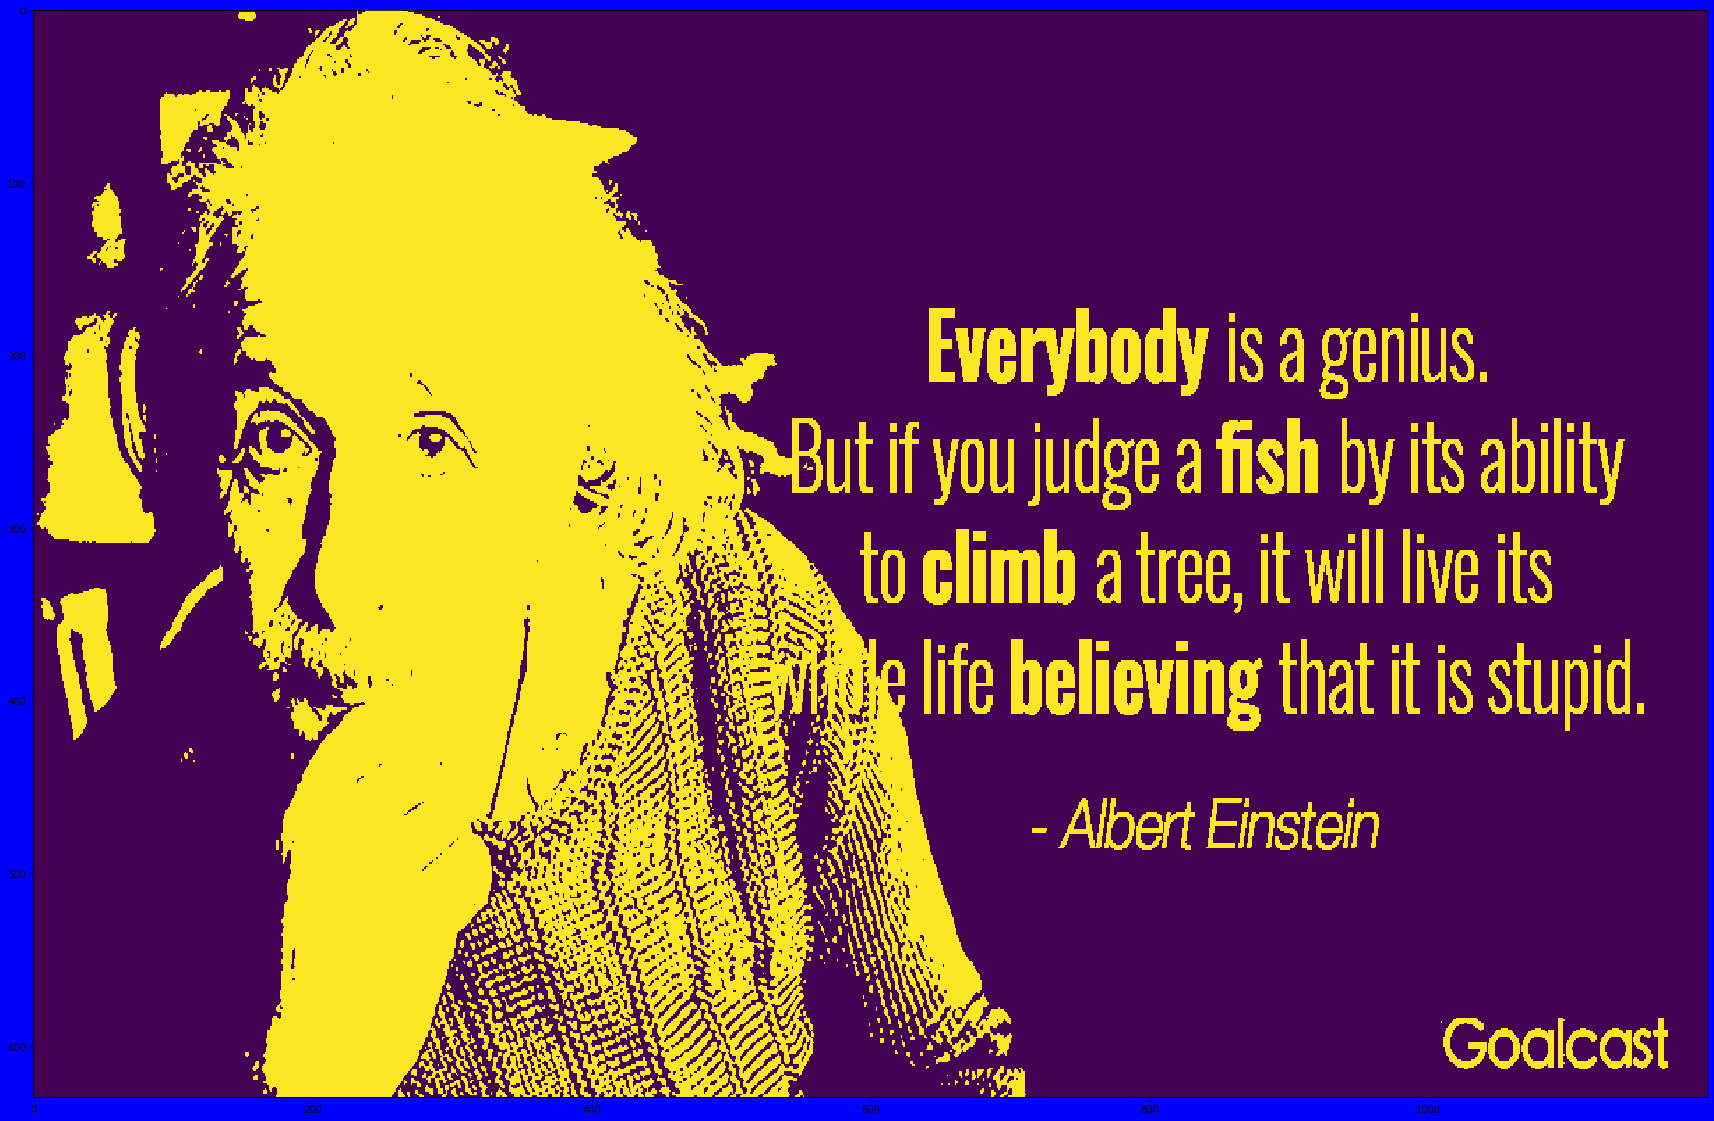

In [12]:

import cv2
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
%matplotlib inline

path = './einstein_quote.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_UNCHANGED)

pipeline = CV2Pipeline()
pipeline.add_step(name='Grayscale', new_step=cv2.cvtColor, img_param_name='src', other_params={'code': cv2.COLOR_RGB2GRAY})
pipeline.add_step(name='Simple Threshold', new_step=cv2.threshold, img_param_name='src', other_params={'thresh': 20, 'maxval': 255, 'type': cv2.THRESH_BINARY}, capture_index=1)

img_piped = pipeline.run(img=img)
plt.figure(num=None, figsize=(30, 20), edgecolor='black', facecolor='blue')
plt.imshow(X=img_piped, aspect='auto', origin='upper')

# words spotted
result_text = pytesseract.image_to_data(image=img_piped, output_type=Output.DICT)['text']
print(result_text)


## OCRBundle Class

Custom class that holds image<br>
Uses PIL.Image as default image type

In [17]:

import cv2
import copy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract
from pytesseract import Output
from typing import Union
%matplotlib inline

class OCRBundle:
    """Container for raw image data and detected words"""
    def __init__(self, img: Union[np.ndarray, Image.Image]):
        """Initializes container with image"""
        self.image = img

    @property
    def image(self):
        """Gets raw image"""
        return self.__image
    
    @image.setter
    def image(self, new_img: Union[np.ndarray, Image.Image]) -> None:
        """
        Sets new image, which is same as initialization
        
        Parameters
        new_img - new image
        """
        self.__image = new_img if type(new_img) == Image.Image else Image.fromarray(obj=new_img, mode=None)
        result_data = pytesseract.image_to_data(image=np.asarray(a=new_img), output_type=Output.DICT)
        words = [word for word in result_data['text'] if word.isalpha()]
        self.__word_counter = Counter(words)
        chars = list(''.join(result_data['text']))
        self.__char_counter = Counter(chars)

    @property
    def word_counter(self) -> Counter:
        """Get Counter object for detected words"""
        return self.__word_counter
    
    @property
    def char_counter(self) -> Counter:
        """Get Counter object for detected characters"""
        return self.__char_counter


## OCRBundle Example

<class '__main__.OCRBundle'>
<class 'PIL.Image.Image'>
-----------------------------------------------------------------------------------------------------------------------------
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=1489x101 at 0x7FE0C64173D0>
-----------------------------------------------------------------------------------------------------------------------------
Counter({'This': 1, 'iS': 1, 'sample': 1, 'piece': 1, 'of': 1, 'text': 1, 'used': 1, 'for': 1, 'Fy': 1, 'Tesseract': 1, 'testing': 1})
Counter({'e': 9, 's': 8, 't': 5, 'i': 4, 'p': 4, 'o': 3, 'r': 3, 'T': 2, 'a': 2, 'c': 2, 'f': 2, 'u': 2, 'h': 1, 'S': 1, '@': 1, 'm': 1, 'l': 1, 'x': 1, 'd': 1, 'F': 1, 'y': 1, 'n': 1, 'g': 1, '.': 1})
-----------------------------------------------------------------------------------------------------------------------------


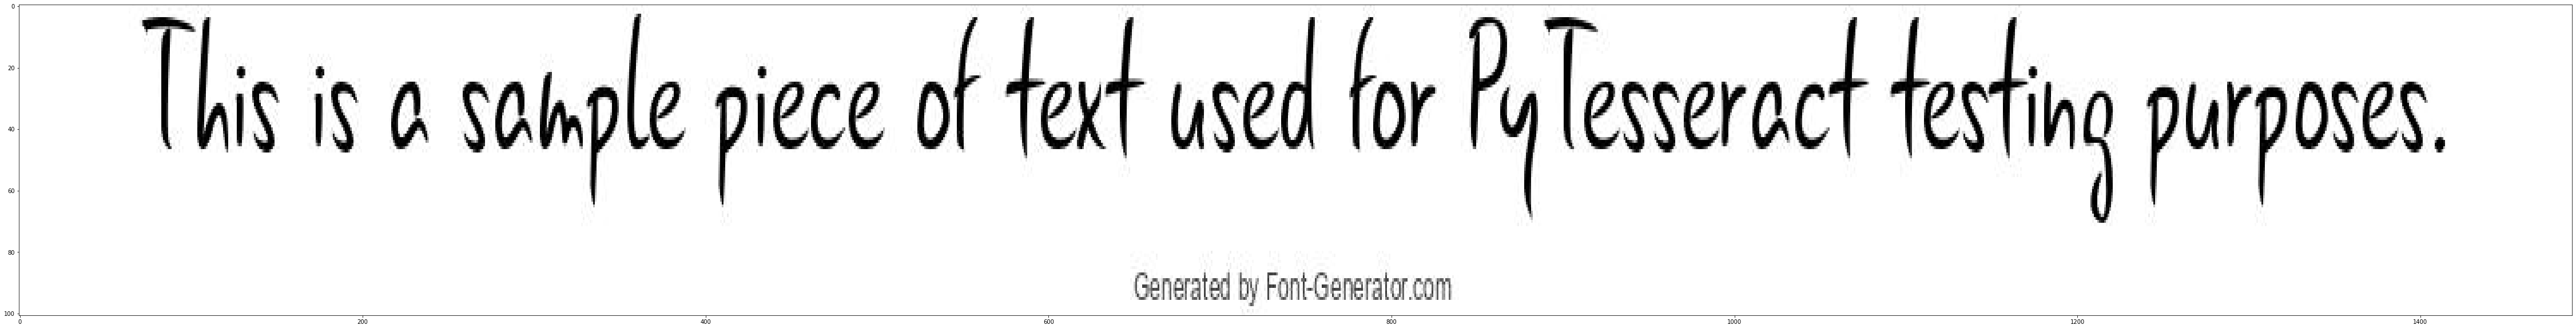

In [18]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(filename='./generatedtext.jpg', flags=cv2.IMREAD_UNCHANGED)
ocrb = OCRBundle(img=img)
img_ocrb = ocrb.image
print(type(ocrb))
print(type(img_ocrb))

print('-' * 125)
print(type(img_ocrb))
print(img_ocrb)
print('-' * 125)
print(ocrb.word_counter)
print(ocrb.char_counter)
print('-' * 125)

fig = plt.figure(num=None, figsize=(80, 10))
plt.imshow(X=img_ocrb, aspect='auto', origin='upper')


## Serializing OCRBundle Using Pickle

<class '__main__.OCRBundle'>
<PIL.Image.Image image mode=RGB size=1489x101 at 0x7FE0B85F5150>
Counter({'This': 1, 'iS': 1, 'sample': 1, 'piece': 1, 'of': 1, 'text': 1, 'used': 1, 'for': 1, 'Fy': 1, 'Tesseract': 1, 'testing': 1})
Counter({'e': 9, 's': 8, 't': 5, 'i': 4, 'p': 4, 'o': 3, 'r': 3, 'T': 2, 'a': 2, 'c': 2, 'f': 2, 'u': 2, 'h': 1, 'S': 1, '@': 1, 'm': 1, 'l': 1, 'x': 1, 'd': 1, 'F': 1, 'y': 1, 'n': 1, 'g': 1, '.': 1})


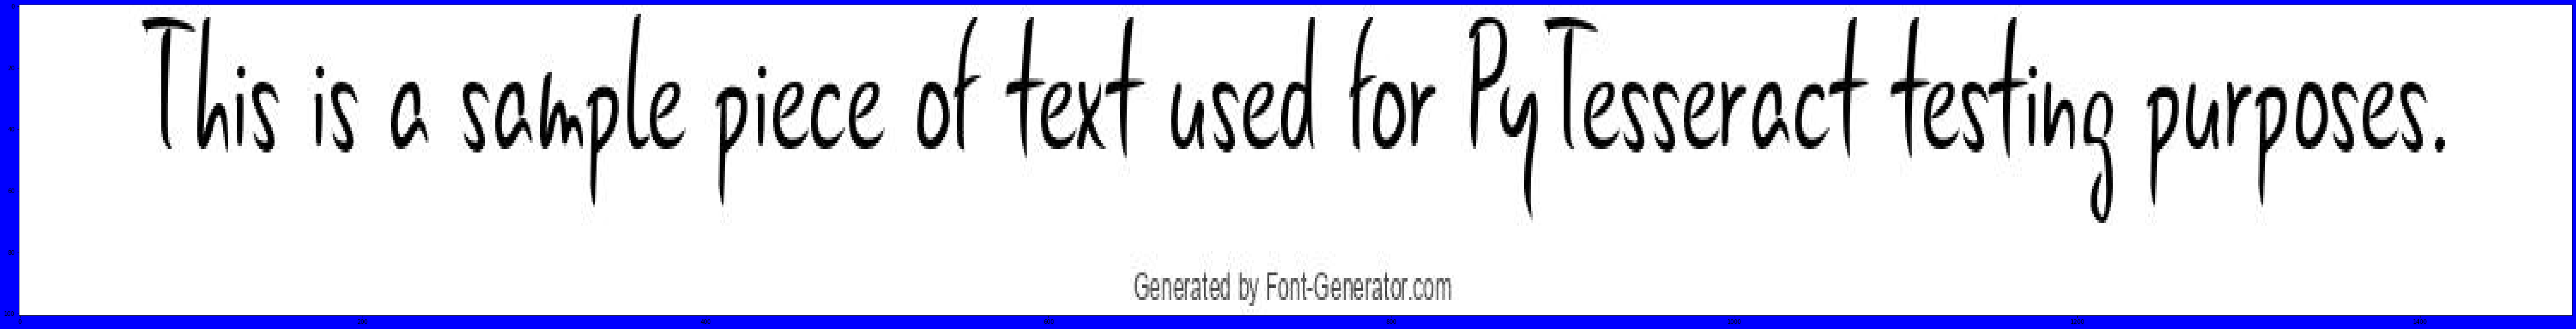

In [27]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

img = cv2.imread(filename='./generatedtext.jpg', flags=cv2.IMREAD_UNCHANGED)
ocrb = OCRBundle(img=img)

with open(file='./dump.txt', mode='wb') as dump:
    pickle.dump(obj=ocrb, file=dump)

with open(file='./dump.txt', mode='rb') as load:
    orcb_load = pickle.load(file=load, fix_imports=True, encoding='UTF-8', errors='strict')
    print(type(orcb_load))
    print(ocrb)
    print(ocrb.image)
    print(ocrb.word_counter)
    print(ocrb.char_counter)
    fig = plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
    plt.imshow(X=np.asarray(a=ocrb.image), aspect='auto', origin='upper')
    